In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib import font_manager, rc
import seaborn as sns
import os
import warnings
import geopandas as gpd
import math

mpl.rcParams['axes.unicode_minus'] = False
warnings.simplefilter('ignore')

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 10

# 1. 군집화 결과

In [2]:
cluster_file_list = os.listdir('../data/군집화 결과')
cluster_file_list

['cluster(data_1214)).csv',
 'cluster(data_1215)).csv',
 'f1(total,bw120_113,local_mul_RFE,1210).csv',
 'f1(평균폐업기간,Q3,maxbw113,local_mul_RF,1207).csv',
 'f2(total,mm,1221)).csv']

In [3]:
dataset_name = [file_name for file_name in os.listdir('../data/Dataset') if '1214' in file_name]
dataset_name

['fixed_dataset_1214.csv']

In [4]:
# open_cluster_data = pd.read_csv(os.path.join('../data/군집화 결과',cluster_file_list[0]),encoding='euc-kr')
# close_cluster_data = pd.read_csv(os.path.join('../data/군집화 결과',cluster_file_list[1]),encoding='euc-kr')
cluster_data = pd.read_csv(os.path.join('../data/군집화 결과',cluster_file_list[1]),encoding='euc-kr')
data = pd.read_csv(os.path.join('../data/Dataset',dataset_name[0]),encoding='euc-kr')

In [5]:
target_var = data.loc[:,['BAS_ID','평균영업기간','평균폐업기간']]
open_cluster = cluster_data.loc[:,'open_15cluster']
close_cluster = cluster_data.loc[:,'close_15cluster']

result = pd.concat([target_var,open_cluster,close_cluster],axis=1)

In [6]:
result['평균영업기간'] = result['평균영업기간'].fillna(0)
result['평균폐업기간'] = result['평균폐업기간'].fillna(0)

In [7]:
result[(result['평균영업기간'] == 0) & (result['평균폐업기간'] ==0)]

,BAS_ID,평균영업기간,평균폐업기간,open_15cluster,close_15cluster
72,21372,0.0,0.0,7.0,NaN
75,21375,0.0,0.0,9.0,6.0
160,21460,0.0,0.0,NaN,NaN


In [8]:
mean_open = 101.741935
# mean_close = 51.453812
mean_close =50.225806

kind = []
for idx, row in result.iterrows():
    con1 = row['평균영업기간'] > 0
    con2 = row['평균폐업기간'] > 0
    if con1 and con2:
        if row['평균영업기간'] > mean_open and row['평균폐업기간'] > mean_close:
            kind.append('HH')
        elif row['평균영업기간'] > mean_open and row['평균폐업기간'] < mean_close:
            kind.append('HL')
        elif row['평균영업기간'] < mean_open and row['평균폐업기간'] > mean_close:
            kind.append('LH')
        elif row['평균영업기간'] < mean_open and row['평균폐업기간'] < mean_close:
            kind.append('LL')
    else:
        kind.append('Not defined')

result['kind'] = kind


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BAS_ID           161 non-null    int64  
 1   평균영업기간           161 non-null    float64
 2   평균폐업기간           161 non-null    float64
 3   open_15cluster   158 non-null    float64
 4   close_15cluster  151 non-null    float64
 5   kind             161 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


In [10]:
sorted(result['open_15cluster'].unique())[:-1]

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0]

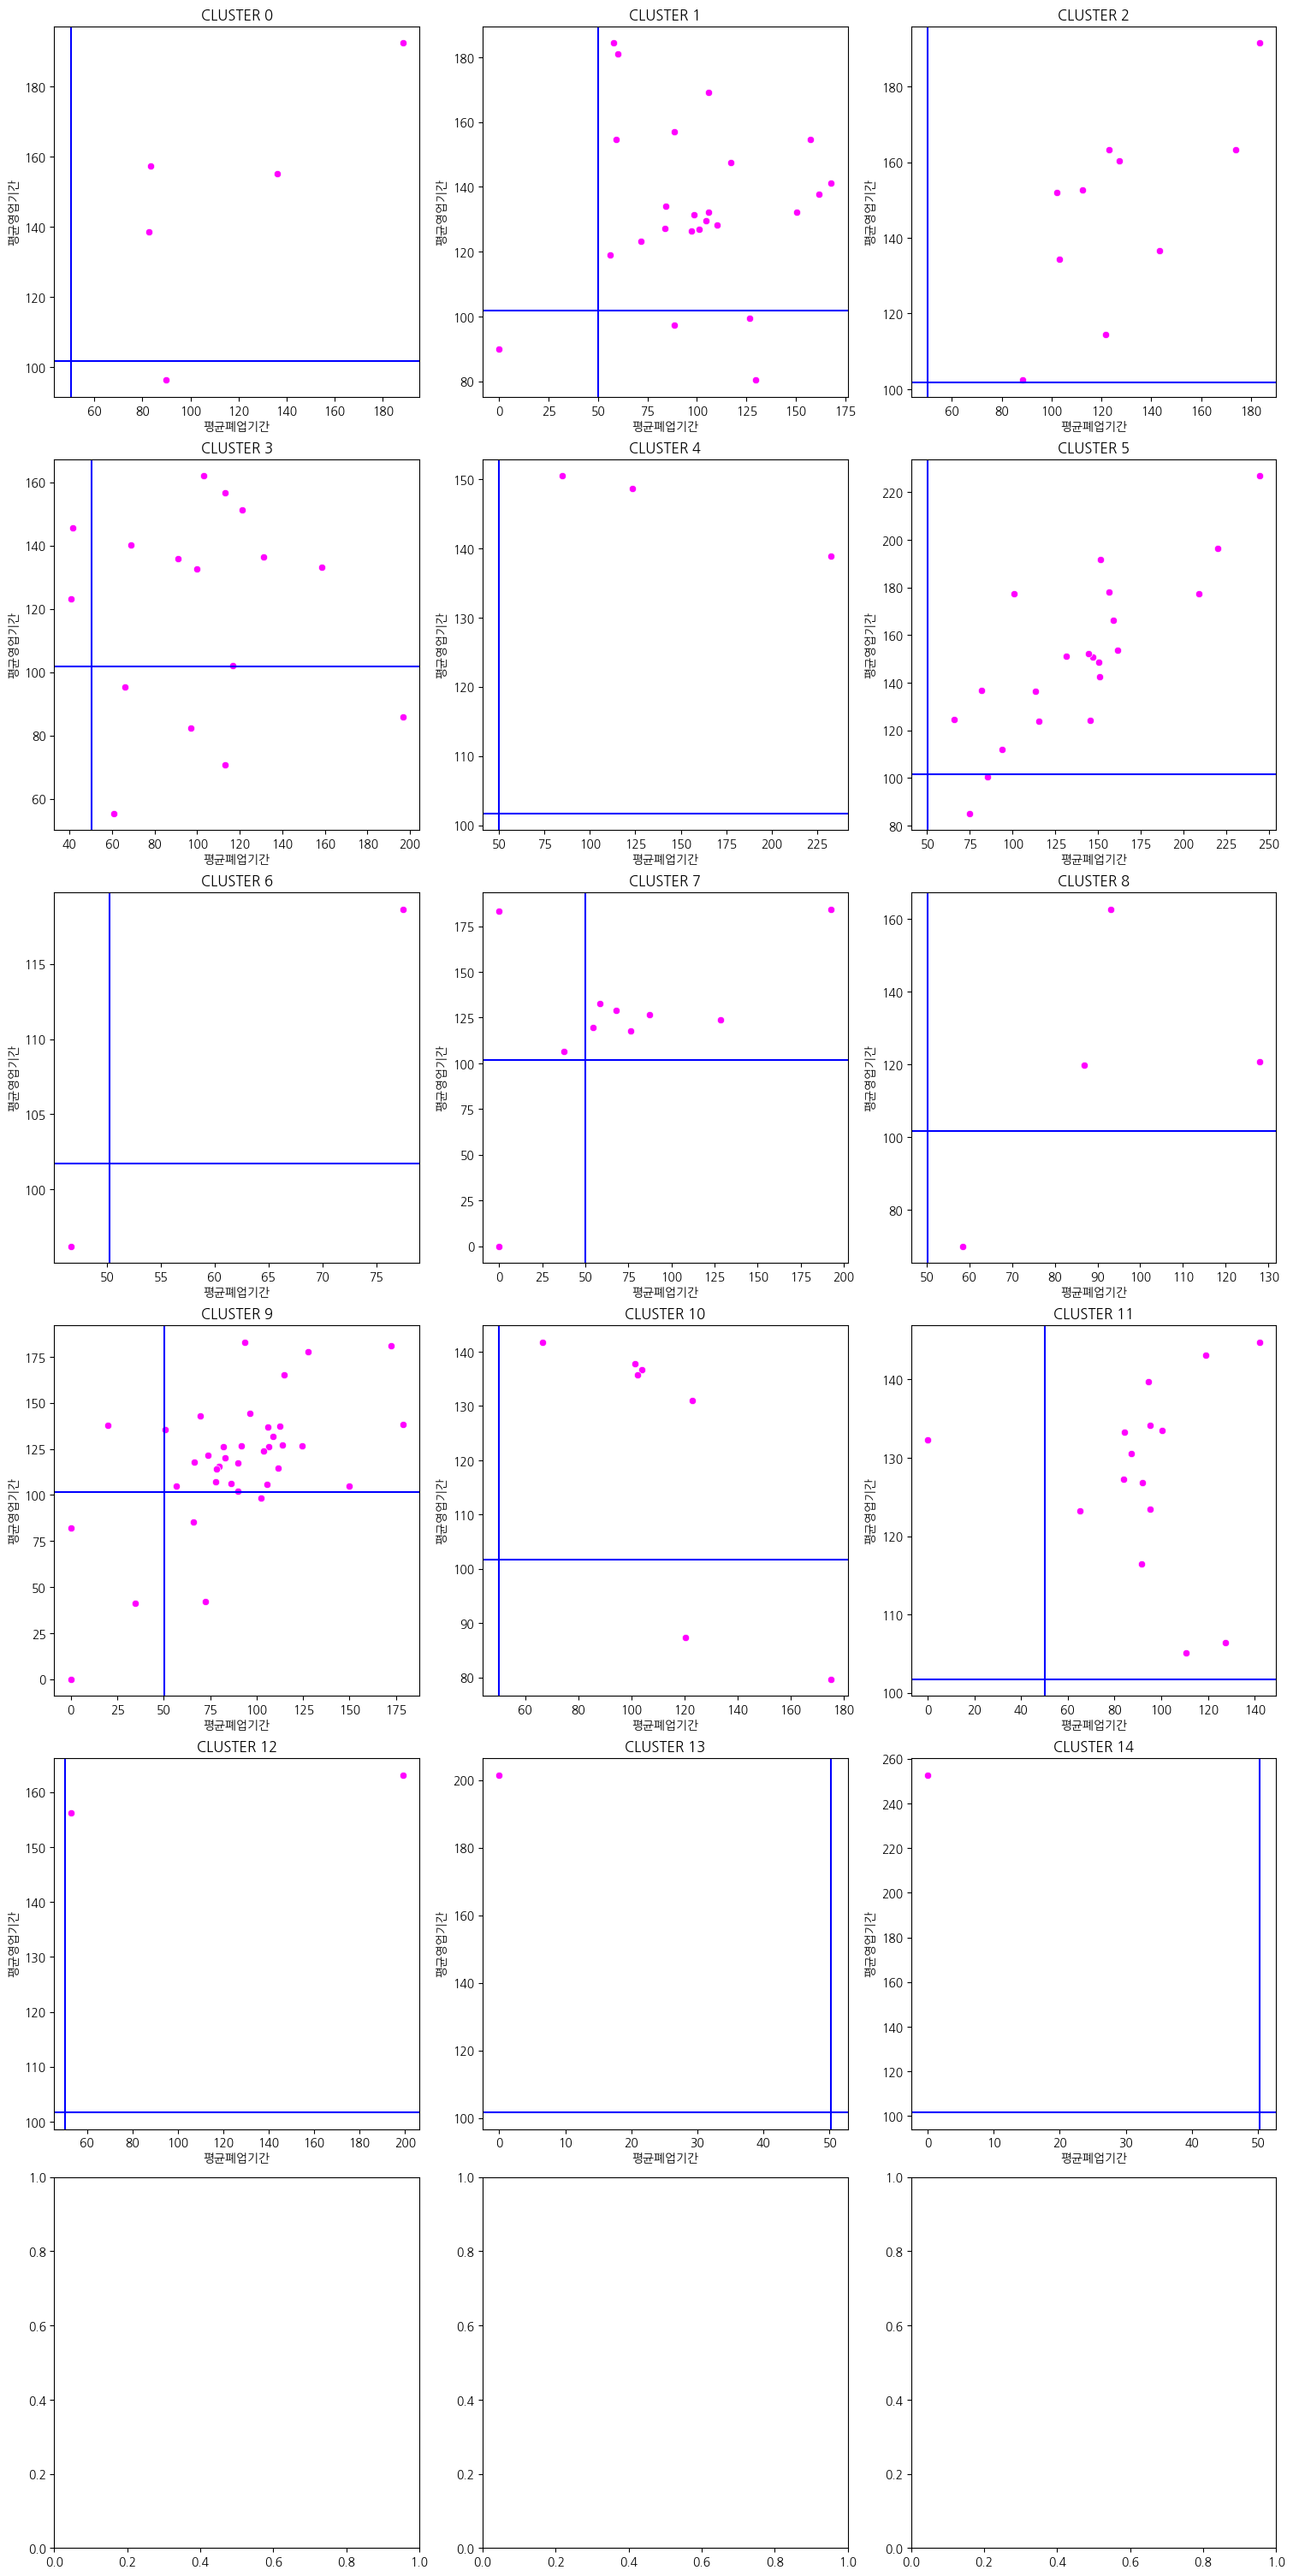

In [11]:
cluster = sorted(result['open_15cluster'].unique().astype(int))[1:]
nrows = int((len(cluster) / 3)+1)
ncols = 3
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,30),constrained_layout=True)

for i in range(nrows):
    for j in range(ncols):
        if (ncols*i+j) == len(cluster):
            break

        cn = cluster[ncols*i+j]
        data_by_cluster = result.loc[result['open_15cluster'] == cn]
        sns.scatterplot(ax=axes[i,j],data=data_by_cluster,x='평균폐업기간',y='평균영업기간',color='magenta',palette='deep')
        axes[i,j].set_title('CLUSTER '+ str(cn))
        axes[i,j].axhline(mean_open,0,data_by_cluster['평균영업기간'].max(),color='blue')
        axes[i,j].axvline(mean_close,0,data_by_cluster['평균영업기간'].max(),color='blue')

plt.show()

# 2. 서울 상권

In [12]:
os.listdir('../data')

['202105기초구역DB_전체분',
 'Dataset',
 'EMD_202101 (1)',
 'fixed_dataset(자동차제거,매출raw,null유지,원래연면적,1201).csv',
 'SIG_202101',
 'Z_KAIS_TL_SPRD_MANAGE_인천',
 '건물 리스트',
 '결과 데이터',
 '결과 이미지',
 '군집화 결과',
 '데이터 현황_10_19.xlsx',
 '매출데이터(신한카드)',
 '모델 평가',
 '부평구 상권 데이터.csv',
 '부평구_상가_데이터.csv',
 '부평구_인허가.csv',
 '서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv',
 '아파트 거래내역',
 '유동인구',
 '인천광역시 부평구_아파트 현황_20210928.csv',
 '인천광역시 지하철 데이터.csv',
 '인천광역시_정류소현황목록.csv',
 '전처리 파일',
 '최적모델평가지표(평균영업기간,자동차제거,매출log,null유지).csv',
 '최적모델평가지표(평균영업기간,자동차제거,매출log,null유지,1109).csv',
 '최적모델평가지표(평균영업기간,자동차제거,매출log,null유지,절사평균).csv',
 '테이블 명세서.txt',
 '표제부 조회.xlsx']

In [13]:
seoul_data = pd.read_csv('../data/서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv',encoding='euc-kr')

In [14]:
drop_index = seoul_data.loc[seoul_data['상권_구분_코드_명'] == '관광특구'].index
refined_seoul_data = seoul_data.drop(drop_index,axis=0)

In [15]:
refined_seoul_data.loc[:,:]

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
6,2021,3,R,전통시장,1001490,길동복조리시장,LL,다이나믹,111,50,117,55
7,2021,3,R,전통시장,1001489,둔촌역전통시장,HL,상권축소,131,47,117,55
8,2021,3,R,전통시장,1001488,성내골목시장,LL,다이나믹,111,46,117,55
9,2021,3,R,전통시장,1001487,천호시장,HH,정체,193,75,117,55
10,2021,3,R,전통시장,1001486,동서울시장,HH,정체,166,110,117,55
...,...,...,...,...,...,...,...,...,...,...,...,...
46371,2014,1,A,골목상권,1000005,백석동길,LH,상권확장,67,44,91,44
46372,2014,1,A,골목상권,1000004,명륜길,LH,상권확장,83,55,91,44
46373,2014,1,A,골목상권,1000003,돈화문로11가길,HH,정체,97,46,91,44
46374,2014,1,A,골목상권,1000002,난계로27길,HL,상권축소,99,37,91,44


In [16]:
refined_seoul_data['기준_년_코드'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [17]:
refined_seoul_data['상권_구분_코드_명'].unique()

array(['전통시장', '발달상권', '골목상권'], dtype=object)

In [18]:
refined_seoul_data.describe().iloc[:,3:]\
    # .transpose().to_csv('../data/결과 데이터/서울시 운영 평균 집계 데이터.csv',encoding='euc-kr')

,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
count,46190.000000,46190.000000,46190.000000,46190.000000
mean,104.595280,51.429184,101.741935,50.225806
std,22.949329,9.905990,8.044190,3.240004
min,30.000000,0.000000,91.000000,44.000000
25%,90.000000,46.000000,95.000000,48.000000
50%,102.000000,50.000000,98.000000,50.000000
75%,115.000000,55.000000,110.000000,54.000000
max,357.000000,277.000000,117.000000,55.000000


In [19]:
refined_seoul_data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
6,2021,3,R,전통시장,1001490,길동복조리시장,LL,다이나믹,111,50,117,55
7,2021,3,R,전통시장,1001489,둔촌역전통시장,HL,상권축소,131,47,117,55
8,2021,3,R,전통시장,1001488,성내골목시장,LL,다이나믹,111,46,117,55
9,2021,3,R,전통시장,1001487,천호시장,HH,정체,193,75,117,55
10,2021,3,R,전통시장,1001486,동서울시장,HH,정체,166,110,117,55
...,...,...,...,...,...,...,...,...,...,...,...,...
46371,2014,1,A,골목상권,1000005,백석동길,LH,상권확장,67,44,91,44
46372,2014,1,A,골목상권,1000004,명륜길,LH,상권확장,83,55,91,44
46373,2014,1,A,골목상권,1000003,돈화문로11가길,HH,정체,97,46,91,44
46374,2014,1,A,골목상권,1000002,난계로27길,HL,상권축소,99,37,91,44


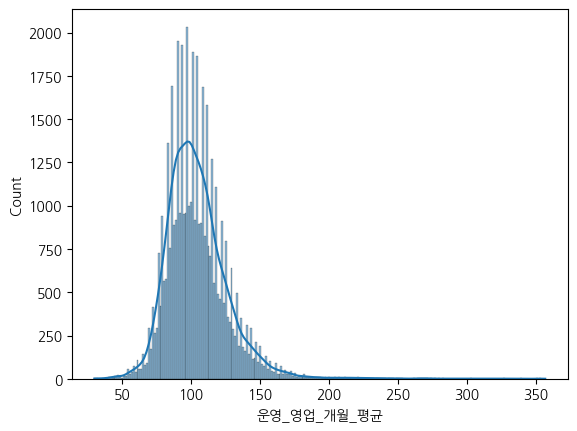

In [20]:
sns.histplot(refined_seoul_data['운영_영업_개월_평균'],kde=True)
plt.show()

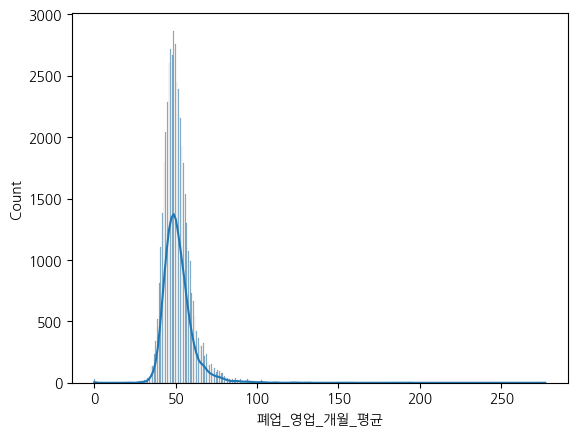

In [21]:
sns.histplot(refined_seoul_data['폐업_영업_개월_평균'],kde=True)
plt.show()

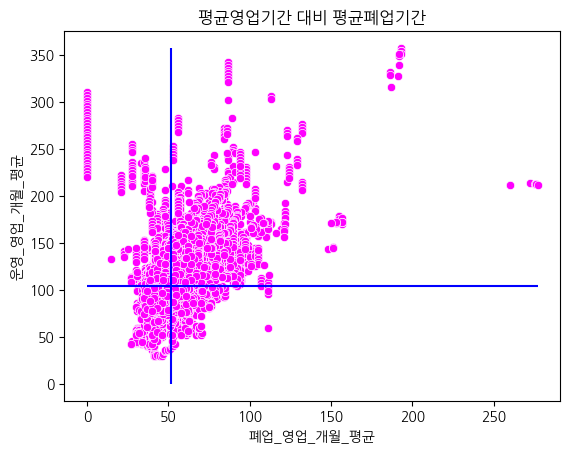

In [22]:
sns.scatterplot(data=refined_seoul_data,x='폐업_영업_개월_평균',y='운영_영업_개월_평균',color='magenta',palette='deep')
plt.title('평균영업기간 대비 평균폐업기간')
plt.hlines(refined_seoul_data['운영_영업_개월_평균'].mean(),0,refined_seoul_data['폐업_영업_개월_평균'].max(),color='blue')
plt.vlines(refined_seoul_data['폐업_영업_개월_평균'].mean(),0,refined_seoul_data['운영_영업_개월_평균'].max(),color='blue')
plt.show()

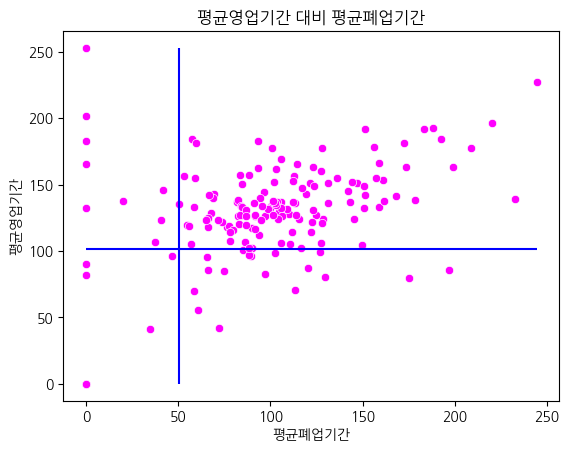

In [23]:
sns.scatterplot(data=result,x='평균폐업기간',y='평균영업기간',color='magenta',palette='deep')
plt.title('평균영업기간 대비 평균폐업기간')
plt.hlines(mean_open,0,result['평균폐업기간'].max(),color='blue')
plt.vlines(mean_close,0,result['평균영업기간'].max(),color='blue')
plt.show()

In [24]:
close = result.loc[result['평균폐업기간'] != 0,'평균폐업기간']
open = result.iloc[close.index,:]['평균영업기간']
display(close)
display(open)

0      199.056791
1       52.896363
2       93.787005
3      161.293272
4      100.922903
          ...    
154     59.894454
155    192.628185
156     60.770584
157     71.828078
158    122.642589
Name: 평균폐업기간, Length: 151, dtype: float64

0      163.106482
1      156.249615
2      111.950730
3      153.728003
4      177.329451
          ...    
154    180.990255
155    184.380241
156     55.406477
157    123.192430
158    122.109657
Name: 평균영업기간, Length: 151, dtype: float64

In [25]:
np.corrcoef(open,close)

array([[1.        , 0.42860382],
       [0.42860382, 1.        ]])

In [26]:
result.loc[:,['평균폐업기간','평균영업기간']].describe()

,평균폐업기간,평균영업기간
count,161.000000,161.000000
mean,100.944274,130.626281
std,47.360750,36.261523
min,0.000000,0.000000
25%,76.454809,116.446243
50%,99.848340,132.306618
75%,124.542540,150.927607
max,244.492905,252.747147


In [27]:
result[result['kind'] == 'Not defined']

,BAS_ID,평균영업기간,평균폐업기간,open_15cluster,close_15cluster,kind
22,21322,201.466149,0.0,13.0,NaN,Not defined
27,21327,89.858108,0.0,1.0,NaN,Not defined
39,21339,82.104355,0.0,9.0,NaN,Not defined
72,21372,0.000000,0.0,7.0,NaN,Not defined
73,21373,252.747147,0.0,14.0,12.0,Not defined
75,21375,0.000000,0.0,9.0,6.0,Not defined
81,21381,183.029083,0.0,7.0,7.0,Not defined
86,21386,132.306618,0.0,11.0,10.0,Not defined
159,21459,165.177930,0.0,NaN,NaN,Not defined
160,21460,0.000000,0.0,NaN,NaN,Not defined


In [28]:
basis_path = '../data/전처리 파일/부평구_기초구역_5181/부평구_기초구역_5181.shp'
# basis_bound = '../data/전처리 파일/부평구_기초구역_5181/기초구역_경계_라인_통합_5181.shp'

basis_data = gpd.read_file(basis_path).loc[:,['BAS_ID','geometry']]
# basis_bound_data = gpd.read_file(basis_bound).loc[:,['BAS_ID','geometry']]
result['BAS_ID'] = result['BAS_ID'].astype(str)

In [29]:
int_data = result.merge(basis_data,how='inner',right_on='BAS_ID',left_on='BAS_ID')

In [30]:
# HH : 정체형, 창업 진출입시 세심한 주의 상권
HH = int_data[int_data['kind'] == 'HH']

# HL : 상권축소형, 경쟁력 있는 기존 업체 우위 상권
HL = int_data[int_data['kind'] == 'HL']

# LH : 상권확장형, 경쟁력 있는 신규 창업 우위 상권
LH = int_data[int_data['kind'] == 'LH']

# LL : 다이나믹(순환)형, 도시재생 및 신규 개발상권으로 창업 진출입시 세심한 주의 상권
LL = int_data[int_data['kind'] == 'LL']

kind_list = [HH,HL,LH,LL]

In [31]:
print(('='*15)+' 상권변화 유형별 갯수 '+('='*15))
print('HH : {0}\nHL : {1}\nLH : {2}\nLL : {3}'.format(len(HH),len(HL),len(LH),len(LL)))

=============== 상권변화 유형별 갯수 ===============
HH : 128
HL : 4
LH : 17
LL : 2


In [32]:
HH.describe()

,평균영업기간,평균폐업기간,open_15cluster,close_15cluster
count,128.000000,128.000000,127.000000,125.00000
mean,139.547250,111.782733,5.913386,5.32000
std,23.195516,38.904717,3.679682,4.46058
min,101.868139,50.533799,0.000000,0.00000
25%,124.003352,84.664632,2.000000,1.00000
50%,135.671754,103.866805,5.000000,5.00000
75%,152.297135,128.061854,9.000000,8.00000
max,226.758696,244.492905,12.000000,14.00000


In [33]:
result.to_csv('../data/전처리 파일/상권 분류.csv',index=False,encoding='euc-kr')

# 3. 군집 간 회귀계수 영향도

In [34]:
open_coef_agg_by_cluster = pd.read_excel('../data/전처리 파일/회귀계수/군집별 데이터 집계 결과.xlsx',sheet_name='평균영업기간 회귀계수')
close_coef_agg_by_cluster = pd.read_excel('../data/전처리 파일/회귀계수/군집별 데이터 집계 결과.xlsx',sheet_name='평균폐업기간 회귀계수')
display(open_coef_agg_by_cluster)
display(close_coef_agg_by_cluster)

,open_15cluster,(주거인구+직장인구) / 유동인구,intercept,공동주택 비율,근린생활시설 비율,단독주택 비율,도로길이고려_전체통합도,도로율,상가밀도,서비스업매출비율,아파트 가구수,외식업매출비율,점포밀도,주거인구/직장인구,평균 도로 길이,평균최근접역거리,평균최근접정류장거리
0,0,16.395536,101.058911,39.304655,22.017713,50.319229,1.423296,-7.007139,28.028843,11.961793,-19.489021,-7.357711,-19.717054,-34.026195,-25.307770,34.463988,-35.614507
1,1,15.714645,100.978389,38.621229,21.316165,67.845827,0.769155,-6.901812,29.542496,11.906482,-26.670117,-6.815736,-18.674456,-28.303805,-26.385961,34.587216,-35.170513
2,2,17.387564,101.459342,40.132438,23.620966,56.750928,2.924518,-6.414165,28.777682,13.326330,-7.166138,-6.319145,-20.274266,-26.564156,-24.104469,35.148620,-35.521279
3,3,15.946712,100.996367,39.218368,23.319112,35.347241,1.527401,-7.359812,25.627368,11.643044,-27.319809,-7.538967,-21.103251,-37.621662,-25.185262,34.591363,-35.262749
4,4,15.146498,100.876640,38.460902,22.009965,59.574392,0.540163,-7.179846,28.431498,11.510700,-51.010384,-7.156946,-19.420055,-43.203878,-26.458535,34.592671,-34.863906
5,5,15.440667,100.849530,38.796940,22.336491,41.789857,0.781104,-7.411307,26.956586,11.275861,-42.562642,-7.694913,-20.304057,-43.834701,-25.952556,34.331944,-35.319423
6,6,16.638894,101.246505,39.261459,21.887162,70.585814,1.755465,-6.536893,30.146957,12.797045,-21.330407,-6.193865,-18.754508,-11.067486,-25.424334,34.917490,-35.337604
7,7,15.704172,100.891265,38.839479,21.713570,50.023092,0.784859,-7.221403,27.931330,11.459832,-33.284467,-7.573202,-19.639211,-43.217131,-26.010986,34.275556,-35.511625
8,8,16.387309,101.103972,39.489277,23.236244,38.685097,1.861638,-7.124777,26.280951,12.032738,-11.827804,-7.301322,-20.852727,-34.708608,-24.921028,34.685234,-35.400124
9,9,15.663956,100.926666,39.138853,24.158561,28.325477,1.557572,-7.738052,23.677872,11.241353,-39.203641,-7.942079,-22.219817,-38.205889,-24.982409,34.564572,-35.088214


,close_15cluster,(주거인구+직장인구) / 유동인구,intercept,공동주택 비율,근린생활시설 비율,단독주택 비율,도로길이고려_전체통합도,도로율,상가밀도,서비스업매출비율,아파트 가구수,외식업매출비율,점포밀도,주거인구/직장인구,평균 도로 길이,평균최근접역거리,평균최근접정류장거리
0,0,38.730610,150.492465,-24.208974,-22.286668,-28.882860,26.765009,-60.567430,23.138032,-14.555793,-46.109570,16.851117,-47.383357,-7.729409,-38.504958,2.785768,-43.905451
1,1,37.145680,150.788624,-23.764824,-23.711279,-27.095318,25.843611,-60.100321,24.660594,-11.846689,-47.874831,18.165027,-45.369611,-8.281192,-35.477889,3.051862,-43.474293
2,2,36.318399,150.554465,-24.245586,-23.743029,-28.987307,25.014408,-60.023546,24.889056,-13.407749,-47.755930,17.863195,-45.215067,-8.575578,-37.282791,-7.406623,-45.306869
3,3,39.336665,150.782954,-23.521458,-21.711022,-24.545573,32.017123,-60.764656,22.242816,-12.424375,-46.340796,16.924437,-48.846117,-6.756935,-37.487020,15.465720,-40.666250
4,4,36.013835,151.279702,-22.452623,-24.589923,-20.441873,29.931893,-59.315203,22.481889,-10.636606,-50.518685,19.742698,-47.238565,-7.941692,-34.474394,14.826520,-41.405774
5,5,39.392576,150.619360,-23.785177,-21.754472,-27.603668,29.680326,-60.732617,22.456538,-13.597072,-45.361679,16.470343,-48.415865,-7.208441,-38.031261,11.382498,-42.307180
6,6,36.467176,151.045478,-23.059603,-24.376471,-23.657405,27.035128,-59.911977,23.242241,-11.253642,-49.767671,19.293348,-46.605581,-7.982795,-34.336563,5.211573,-41.739542
7,7,35.895366,150.418238,-24.383738,-23.993578,-29.063590,24.814502,-60.031748,24.727819,-13.835114,-47.986541,17.834448,-45.353437,-8.721588,-38.516437,-16.477254,-46.241455
8,8,38.953998,150.388902,-24.523418,-21.996308,-29.654015,27.044273,-60.568035,22.531234,-15.129065,-46.415977,16.765292,-48.124451,-7.060637,-39.987874,-3.807289,-44.454886
9,9,40.019620,151.011410,-23.416557,-20.531411,-22.569089,35.206242,-60.537058,22.111365,-11.678379,-46.422237,17.210443,-49.507026,-5.877296,-37.671323,20.008892,-39.365455


## 3.1 평균영업기간

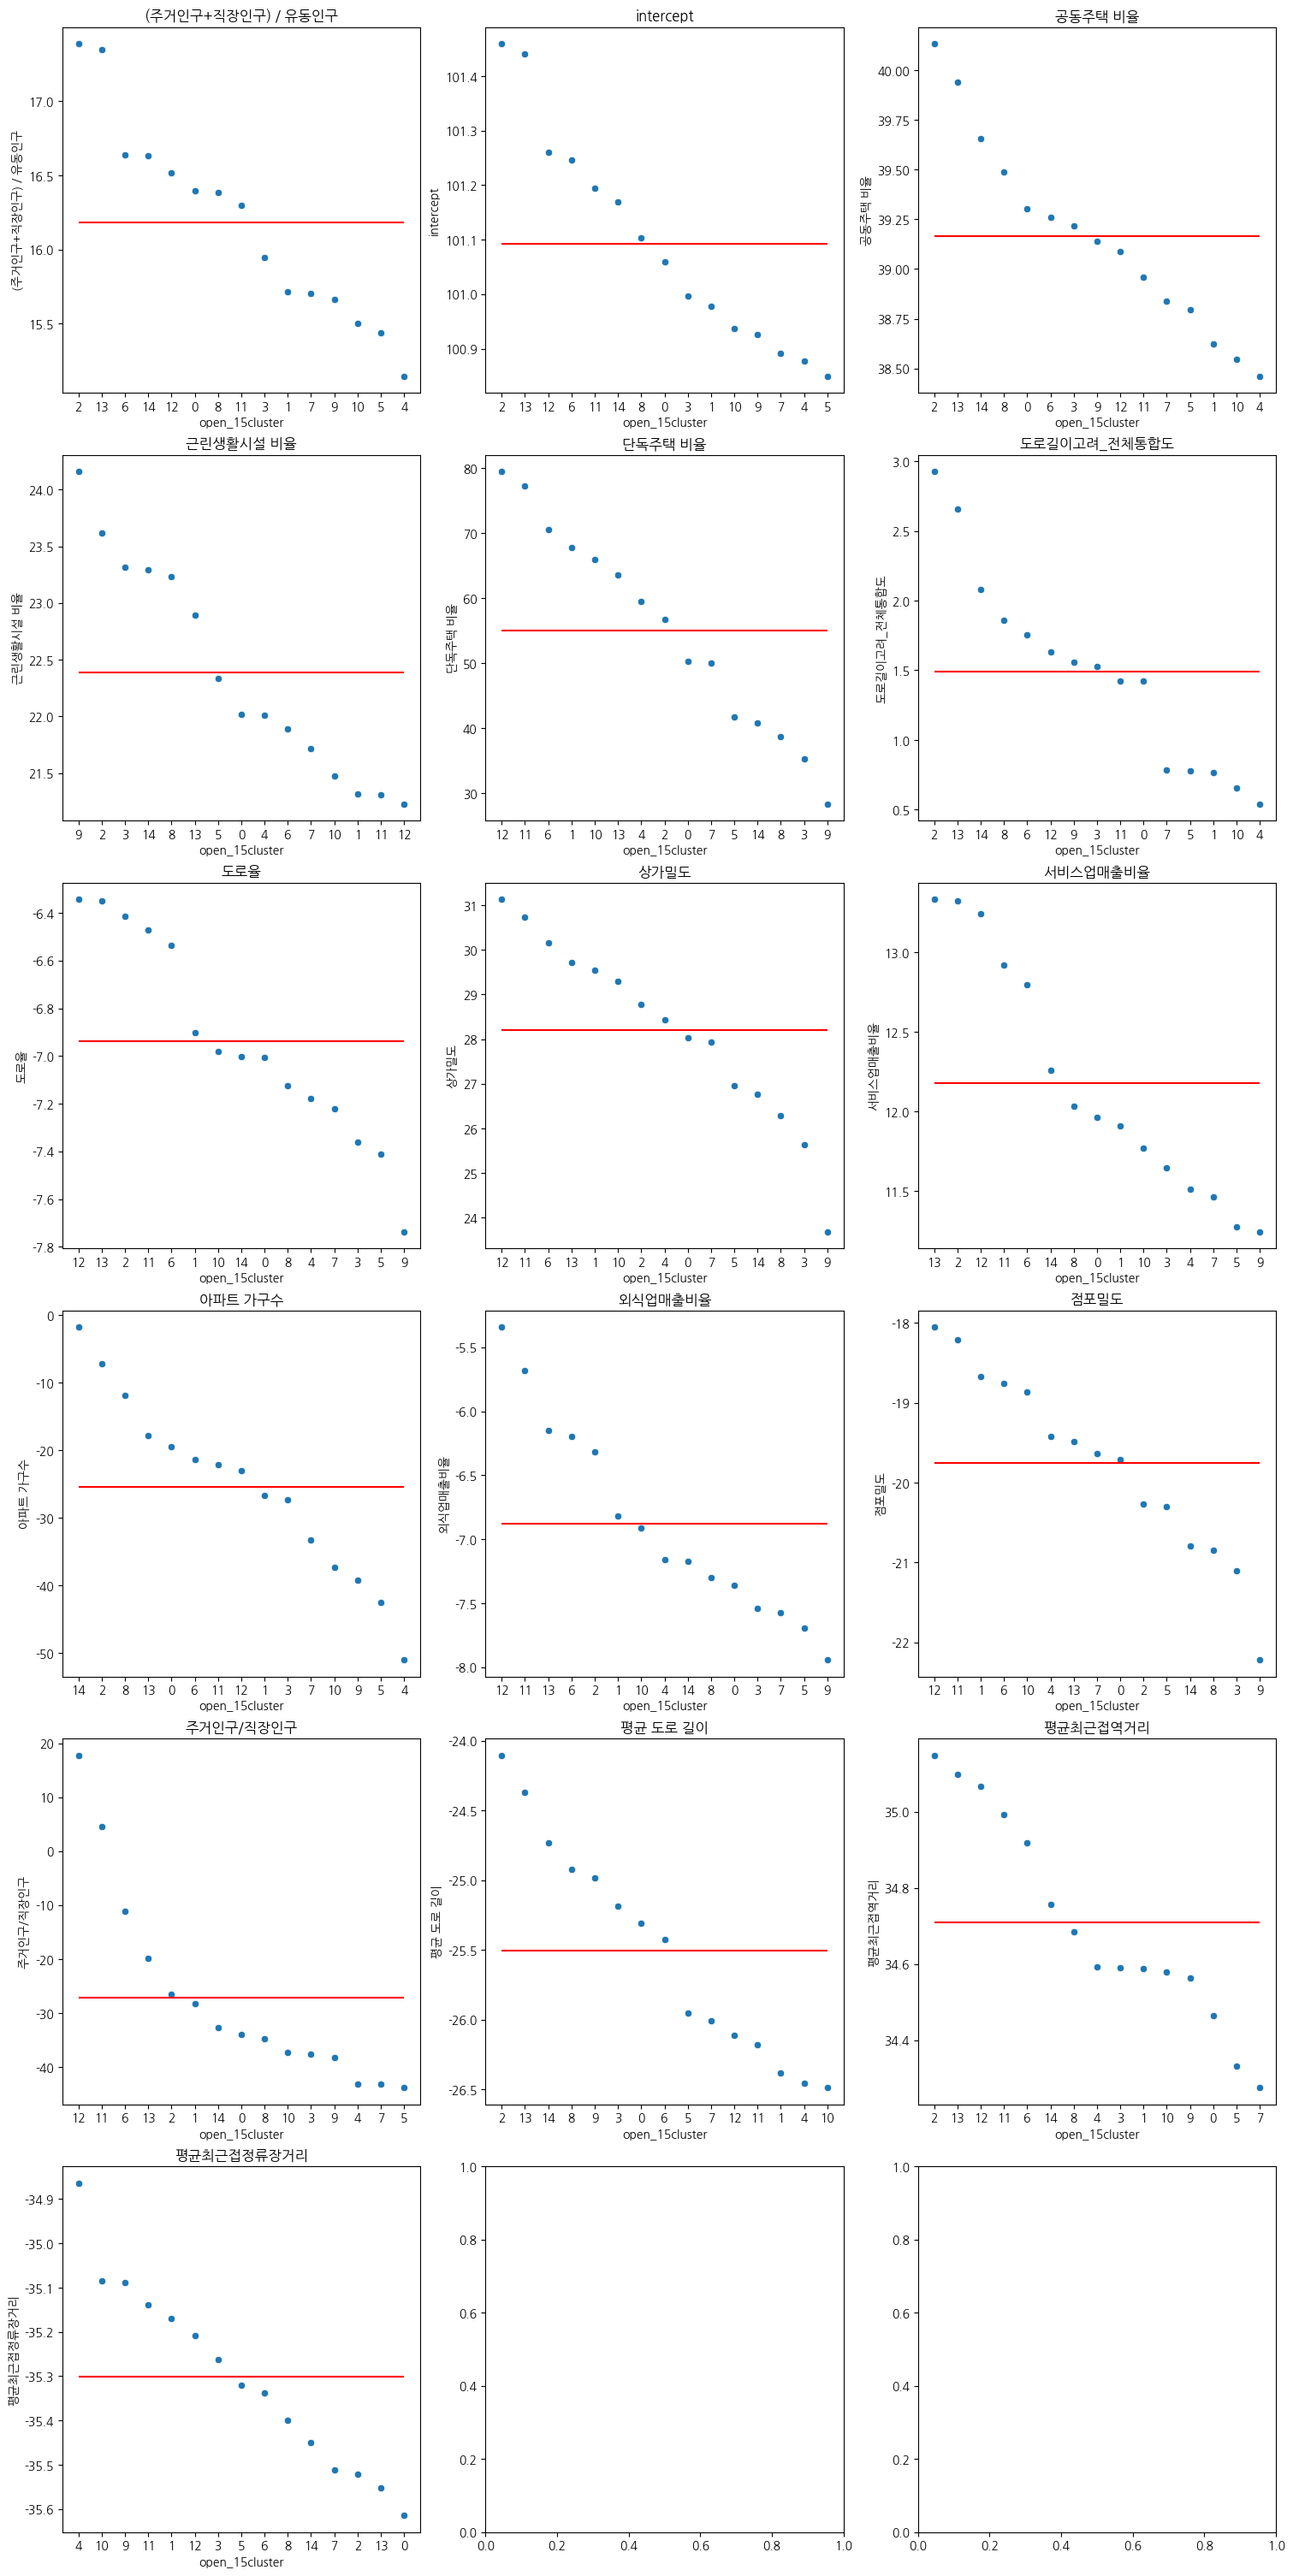

In [40]:

col_list = open_coef_agg_by_cluster.columns[1:]
nrows = int((len(col_list)-1)/3)+1
ncols = 3

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,30),constrained_layout=True)

for i in range(nrows):
    for j in range(ncols):
        if (ncols*i+j) == len(col_list):
            break

        col_name = col_list[ncols*i+j]
        col_data = open_coef_agg_by_cluster.loc[:,['open_15cluster',col_name]]
        col_data['open_15cluster'] = col_data['open_15cluster'].astype(str)
        col_data.sort_values(by=col_name,inplace=True,ascending=False)
        # display(col_data)
        sns.scatterplot(ax=axes[i,j],x='open_15cluster',y=col_name,data=col_data)
        # 내일 순서대로 정렬해보기
        axes[i,j].set_title(col_name)
        axes[i,j].hlines(col_data[col_name].mean(),0,14,color='red')

plt.savefig('../data/결과 이미지/군집별 회귀계수 영향도(평균영업기간).jpg')
plt.show()

## 3.2 평균폐업기간

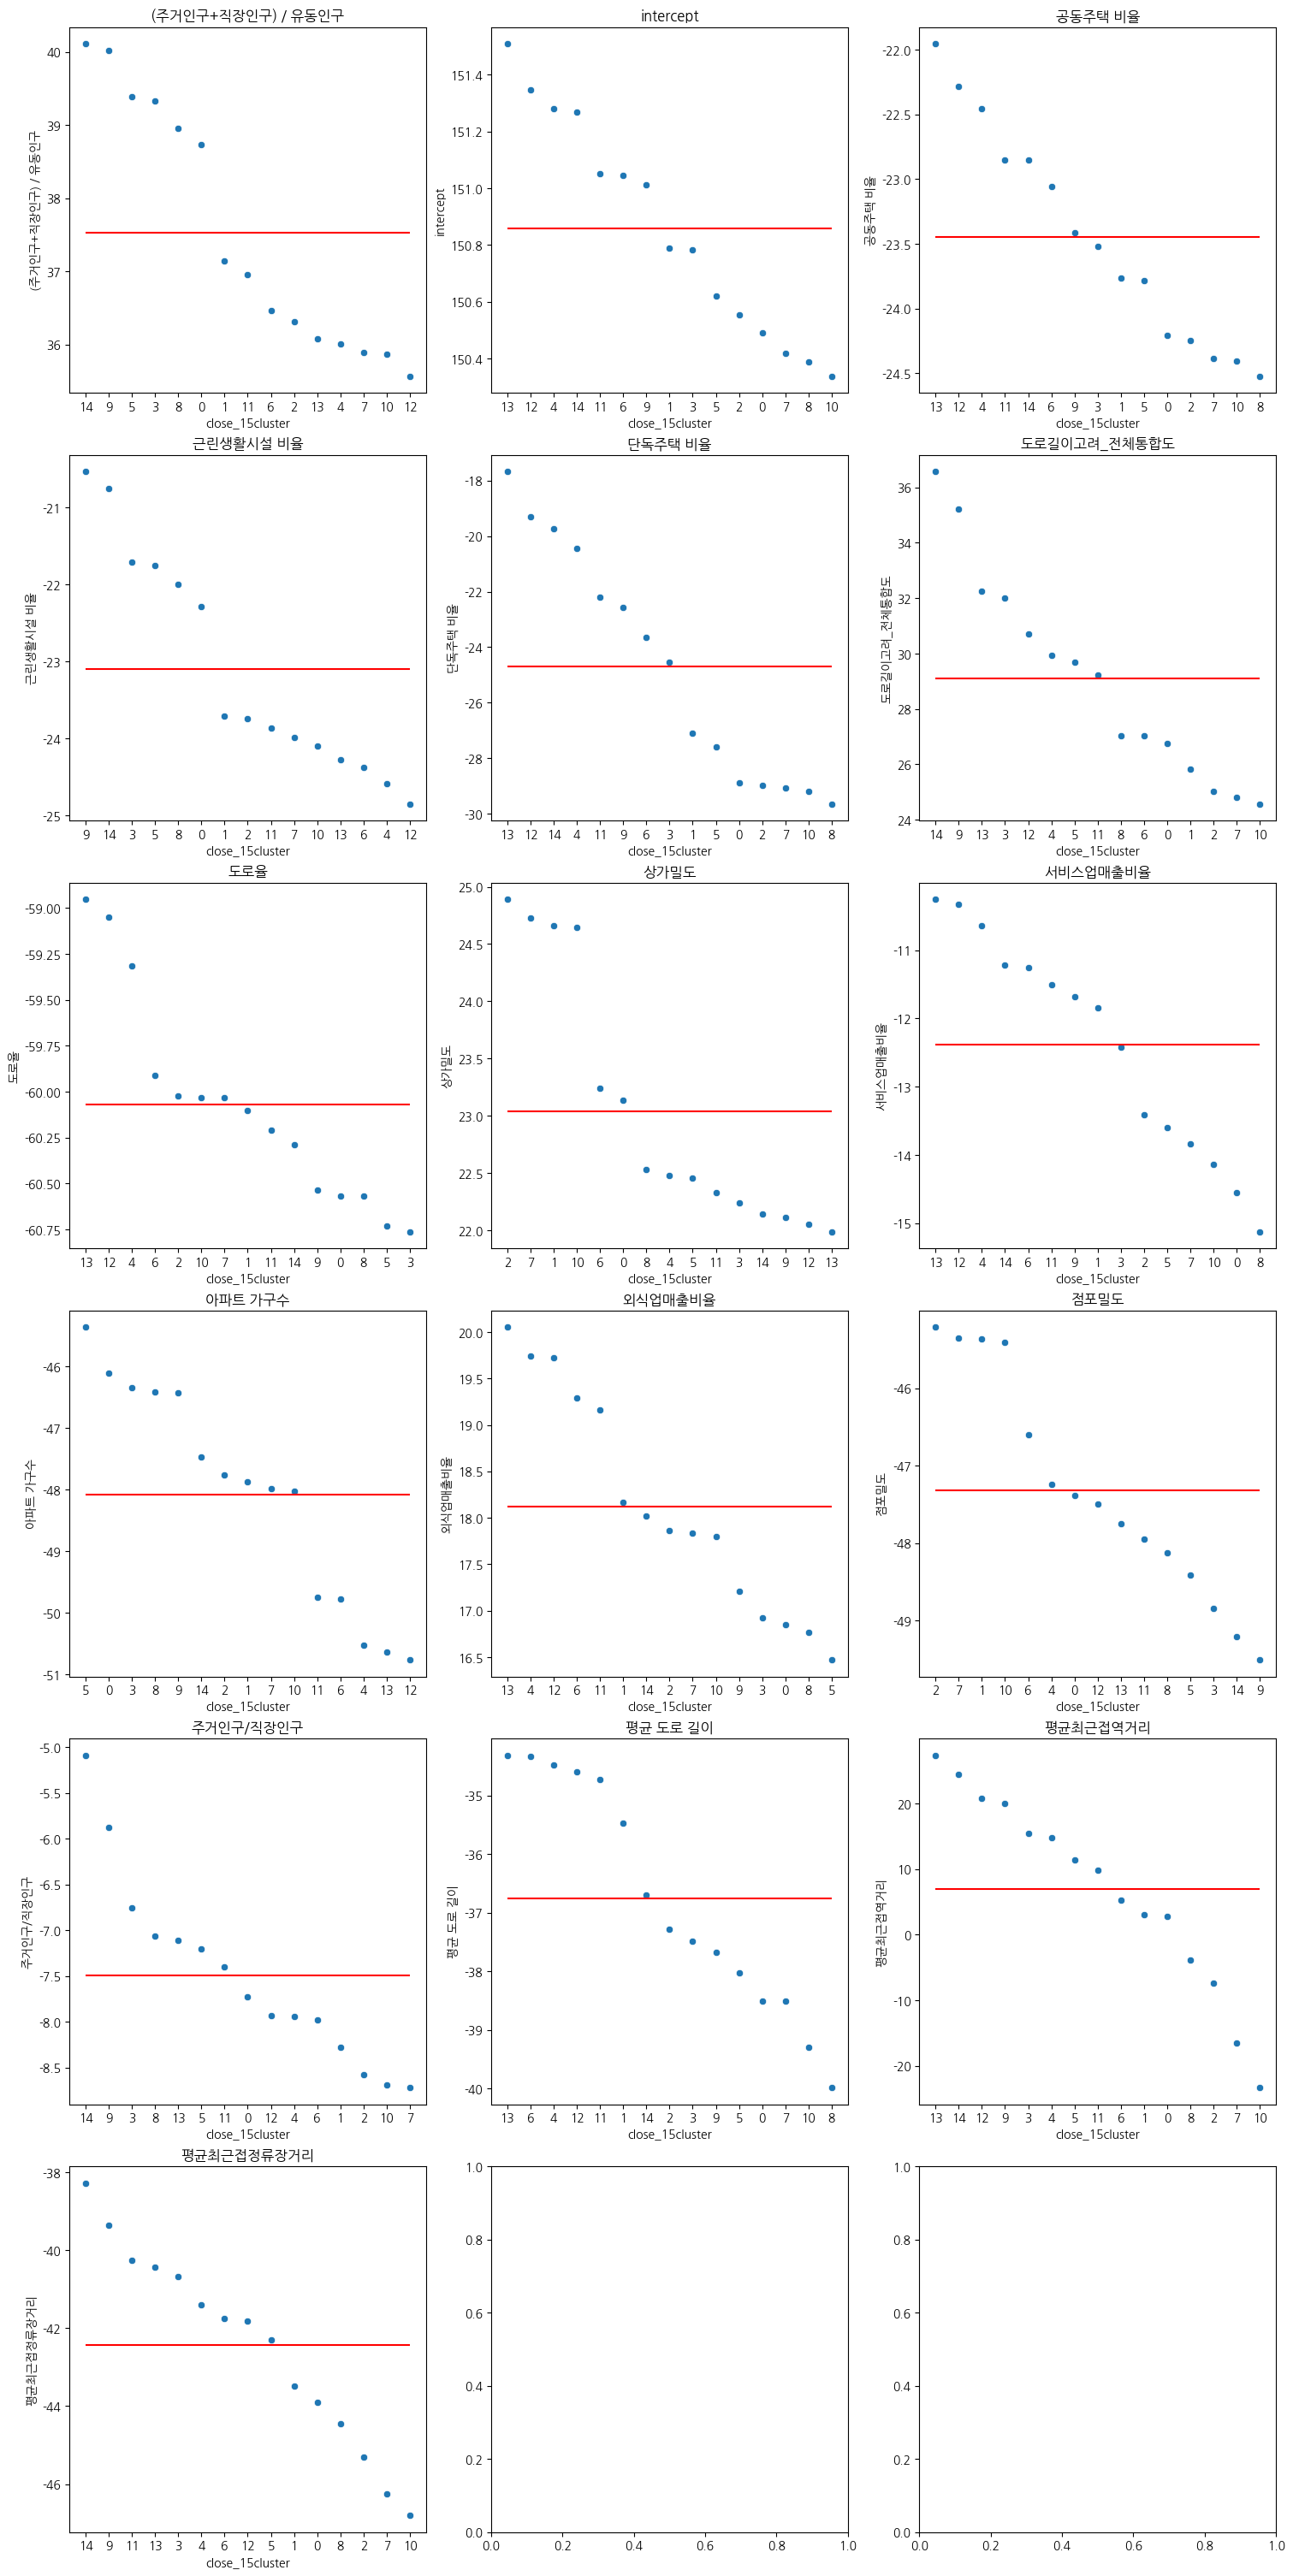

In [41]:
col_list = close_coef_agg_by_cluster.columns[1:]
nrows = int((len(col_list)-1)/3)+1
ncols = 3

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,30),constrained_layout=True)

for i in range(nrows):
    for j in range(ncols):
        if (ncols*i+j) == len(col_list):
            break

        col_name = col_list[ncols*i+j]
        col_data = close_coef_agg_by_cluster.loc[:,['close_15cluster',col_name]]
        col_data['close_15cluster'] = col_data['close_15cluster'].astype(str)
        col_data.sort_values(by=col_name,inplace=True,ascending=False)
        # display(col_data)
        sns.scatterplot(ax=axes[i,j],y=col_name,x='close_15cluster',data=col_data)
        axes[i,j].set_title(col_name)
        axes[i,j].hlines(col_data[col_name].mean(),0,14,color='red')

plt.savefig('../data/결과 이미지/군집별 회귀계수 영향도(평균폐업기간).jpg')
plt.show()

## 3.3 폐엽 vs 영업

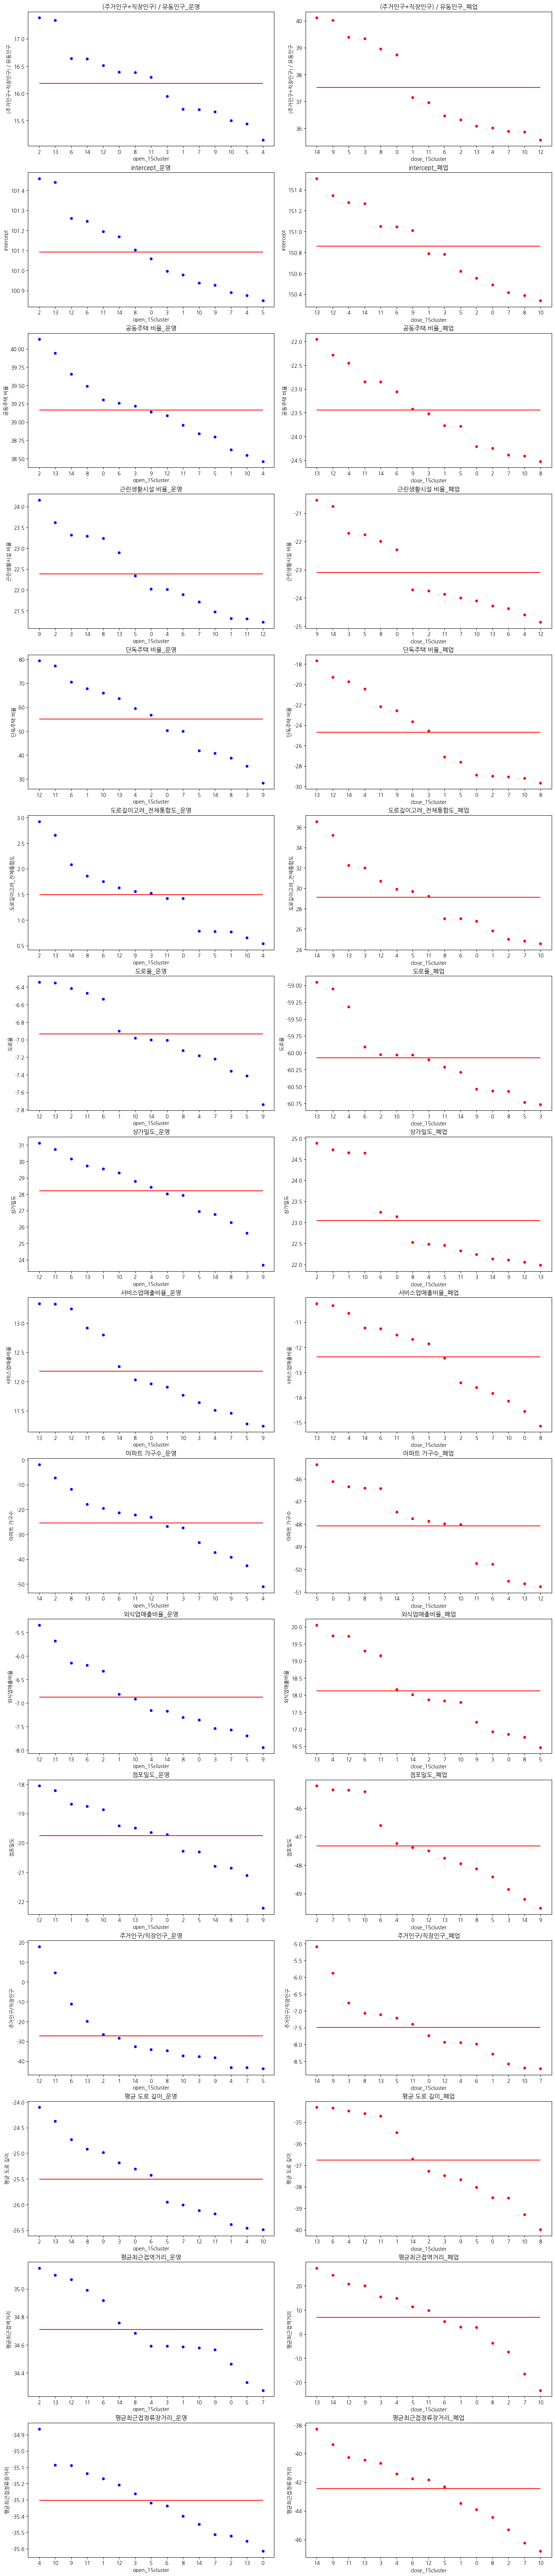

In [42]:
col_list = close_coef_agg_by_cluster.columns[1:]
nrows = len(col_list)
ncols = 2

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,70),constrained_layout=True)

for i in range(nrows):
    col_name = col_list[i]
    open_col_data = open_coef_agg_by_cluster.loc[:,['open_15cluster',col_name]]
    close_col_data = close_coef_agg_by_cluster.loc[:,['close_15cluster',col_name]]

    open_col_data['open_15cluster'] = open_col_data['open_15cluster'].astype(str)
    close_col_data['close_15cluster'] = close_col_data['close_15cluster'].astype(str)

    open_col_data.sort_values(by=col_name,inplace=True,ascending=False)
    close_col_data.sort_values(by=col_name,inplace=True,ascending=False)
        # display(col_data)
    sns.scatterplot(ax=axes[i,0],y=col_name,x='open_15cluster',data=open_col_data,color='blue')
    sns.scatterplot(ax=axes[i,1],y=col_name,x='close_15cluster',data=close_col_data,color='red')
    axes[i,0].set_title(col_name+'_운영')
    axes[i,1].set_title(col_name+'_폐업')
    axes[i,0].hlines(open_col_data[col_name].mean(),0,14,color='red')
    axes[i,1].hlines(close_col_data[col_name].mean(),0,14,color='red')

plt.savefig('../data/결과 이미지/군집별 회귀계수 영향도(운영,폐업).jpg')
plt.show()

# 4. 군집 간 독립변수별 평균데이터

In [39]:
open_agg_by_cluster = pd.read_excel('../data/전처리 파일/회귀계수/군집별 데이터 집계 결과.xlsx',sheet_name='평균영업기간 데이터')
close_agg_by_cluster = pd.read_excel('../data/전처리 파일/회귀계수/군집별 데이터 집계 결과.xlsx',sheet_name='평균폐업기간 데이터')
display(open_agg_by_cluster)
display(close_agg_by_cluster)

,open_15cluster,(주거인구+직장인구) / 유동인구,공동주택 비율,근린생활시설 비율,단독주택 비율,도로길이고려_전체통합도,도로율,상가밀도,서비스업매출비율,아파트 가구수,외식업매출비율,점포밀도,주거인구/직장인구,평균 도로 길이,평균최근접역거리,평균최근접정류장거리
0,0,0.264005,29.466667,25.383333,3.866667,334.779282,41.514630,3391.738374,0.308196,545.000000,0.336243,123.920974,6.068332,139.161715,0.354018,0.065764
1,1,0.203023,28.416667,35.100000,7.150000,384.379325,24.881209,3516.293505,0.313725,46.666667,0.404219,258.036721,5.214145,116.494965,0.297191,0.144471
2,2,0.321506,27.745455,43.445455,10.281818,412.789604,25.944015,975.404252,0.169480,376.909091,0.331330,62.082070,2.094998,252.628434,1.271759,0.094466
3,3,0.423620,54.155556,34.077778,10.427778,315.240371,23.678509,811.366535,0.207675,1403.833333,0.239685,54.238751,15.735079,223.578239,0.820163,0.081660
4,4,0.339308,42.085000,25.765000,20.935000,361.583228,28.289680,1107.323022,0.224627,374.200000,0.217867,50.020457,6.005160,150.611094,0.702916,0.090099
5,5,0.699962,55.480000,20.260000,10.900000,484.448458,28.429648,990.992342,0.215245,788.600000,0.207112,40.659170,8.117044,161.226945,0.844877,0.067212
6,6,0.238843,46.977778,18.166667,9.822222,363.229738,19.446939,684.400139,0.273923,867.666667,0.269647,46.580511,8.146973,141.584241,0.932235,0.063142
7,7,0.298389,32.560000,28.240000,3.100000,463.549947,46.458342,3836.755058,0.211364,28.400000,0.374435,138.191505,3.169025,156.640081,0.490346,0.063020
8,8,0.336465,26.808333,24.875000,27.991667,303.326489,34.916703,1786.947464,0.167396,354.833333,0.363162,70.536866,28.952282,192.613261,0.486006,0.077215
9,9,0.017735,0.000000,100.000000,0.000000,441.854330,5.175969,12.245031,0.055887,0.000000,0.068313,2.666667,0.012871,313.440900,1.491184,0.119186


,close_15cluster,(주거인구+직장인구) / 유동인구,공동주택 비율,근린생활시설 비율,단독주택 비율,도로길이고려_전체통합도,도로율,상가밀도,서비스업매출비율,아파트 가구수,외식업매출비율,점포밀도,주거인구/직장인구,평균 도로 길이,평균최근접역거리,평균최근접정류장거리
0,0,0.458682,50.811111,26.729630,12.951852,366.441555,30.395577,1547.120928,0.228491,888.666667,0.297927,70.179241,22.014362,173.438322,0.586474,0.070326
1,1,0.272754,32.870370,24.674074,7.733333,370.981373,34.436652,3077.832179,0.295290,271.629630,0.317199,149.407077,5.193141,148.803351,0.413484,0.086751
2,2,0.403001,45.710000,25.380000,26.570000,333.443747,30.641936,1364.204749,0.217689,469.400000,0.243962,59.646478,6.766103,131.531422,0.469636,0.080140
3,3,0.395653,46.840000,41.260000,1.620000,520.419182,22.441724,827.131408,0.162299,2860.000000,0.360036,63.936388,8.959695,319.449435,0.758353,0.097299
4,4,0.375059,36.987500,39.000000,21.500000,189.459498,18.060341,1065.208535,0.202139,287.375000,0.429997,59.986070,9.789293,130.702261,0.328705,0.099497
5,5,0.374861,42.742857,25.464286,13.785714,294.119188,31.254803,1064.048470,0.188773,991.071429,0.286146,48.520372,9.915296,176.165505,0.439649,0.080894
6,6,0.248007,48.971429,13.700000,13.942857,373.017837,20.986163,804.681859,0.320581,373.142857,0.141213,50.987012,10.426150,109.596855,0.423343,0.063240
7,7,0.104380,36.200000,52.200000,11.650000,466.813491,27.720749,337.954144,0.071518,359.500000,0.019748,21.683093,2.048089,189.306628,1.151946,0.085632
8,8,0.449369,52.250000,26.350000,18.683333,300.790723,19.580472,438.679593,0.128343,1672.166667,0.150044,37.914812,17.521197,263.419175,1.273273,0.115196
9,9,0.364521,25.966667,38.760000,15.980000,381.953344,27.287533,1235.425189,0.172287,545.000000,0.318260,71.386050,5.003461,188.229619,1.514352,0.094334


## 4.1 평균영업기간

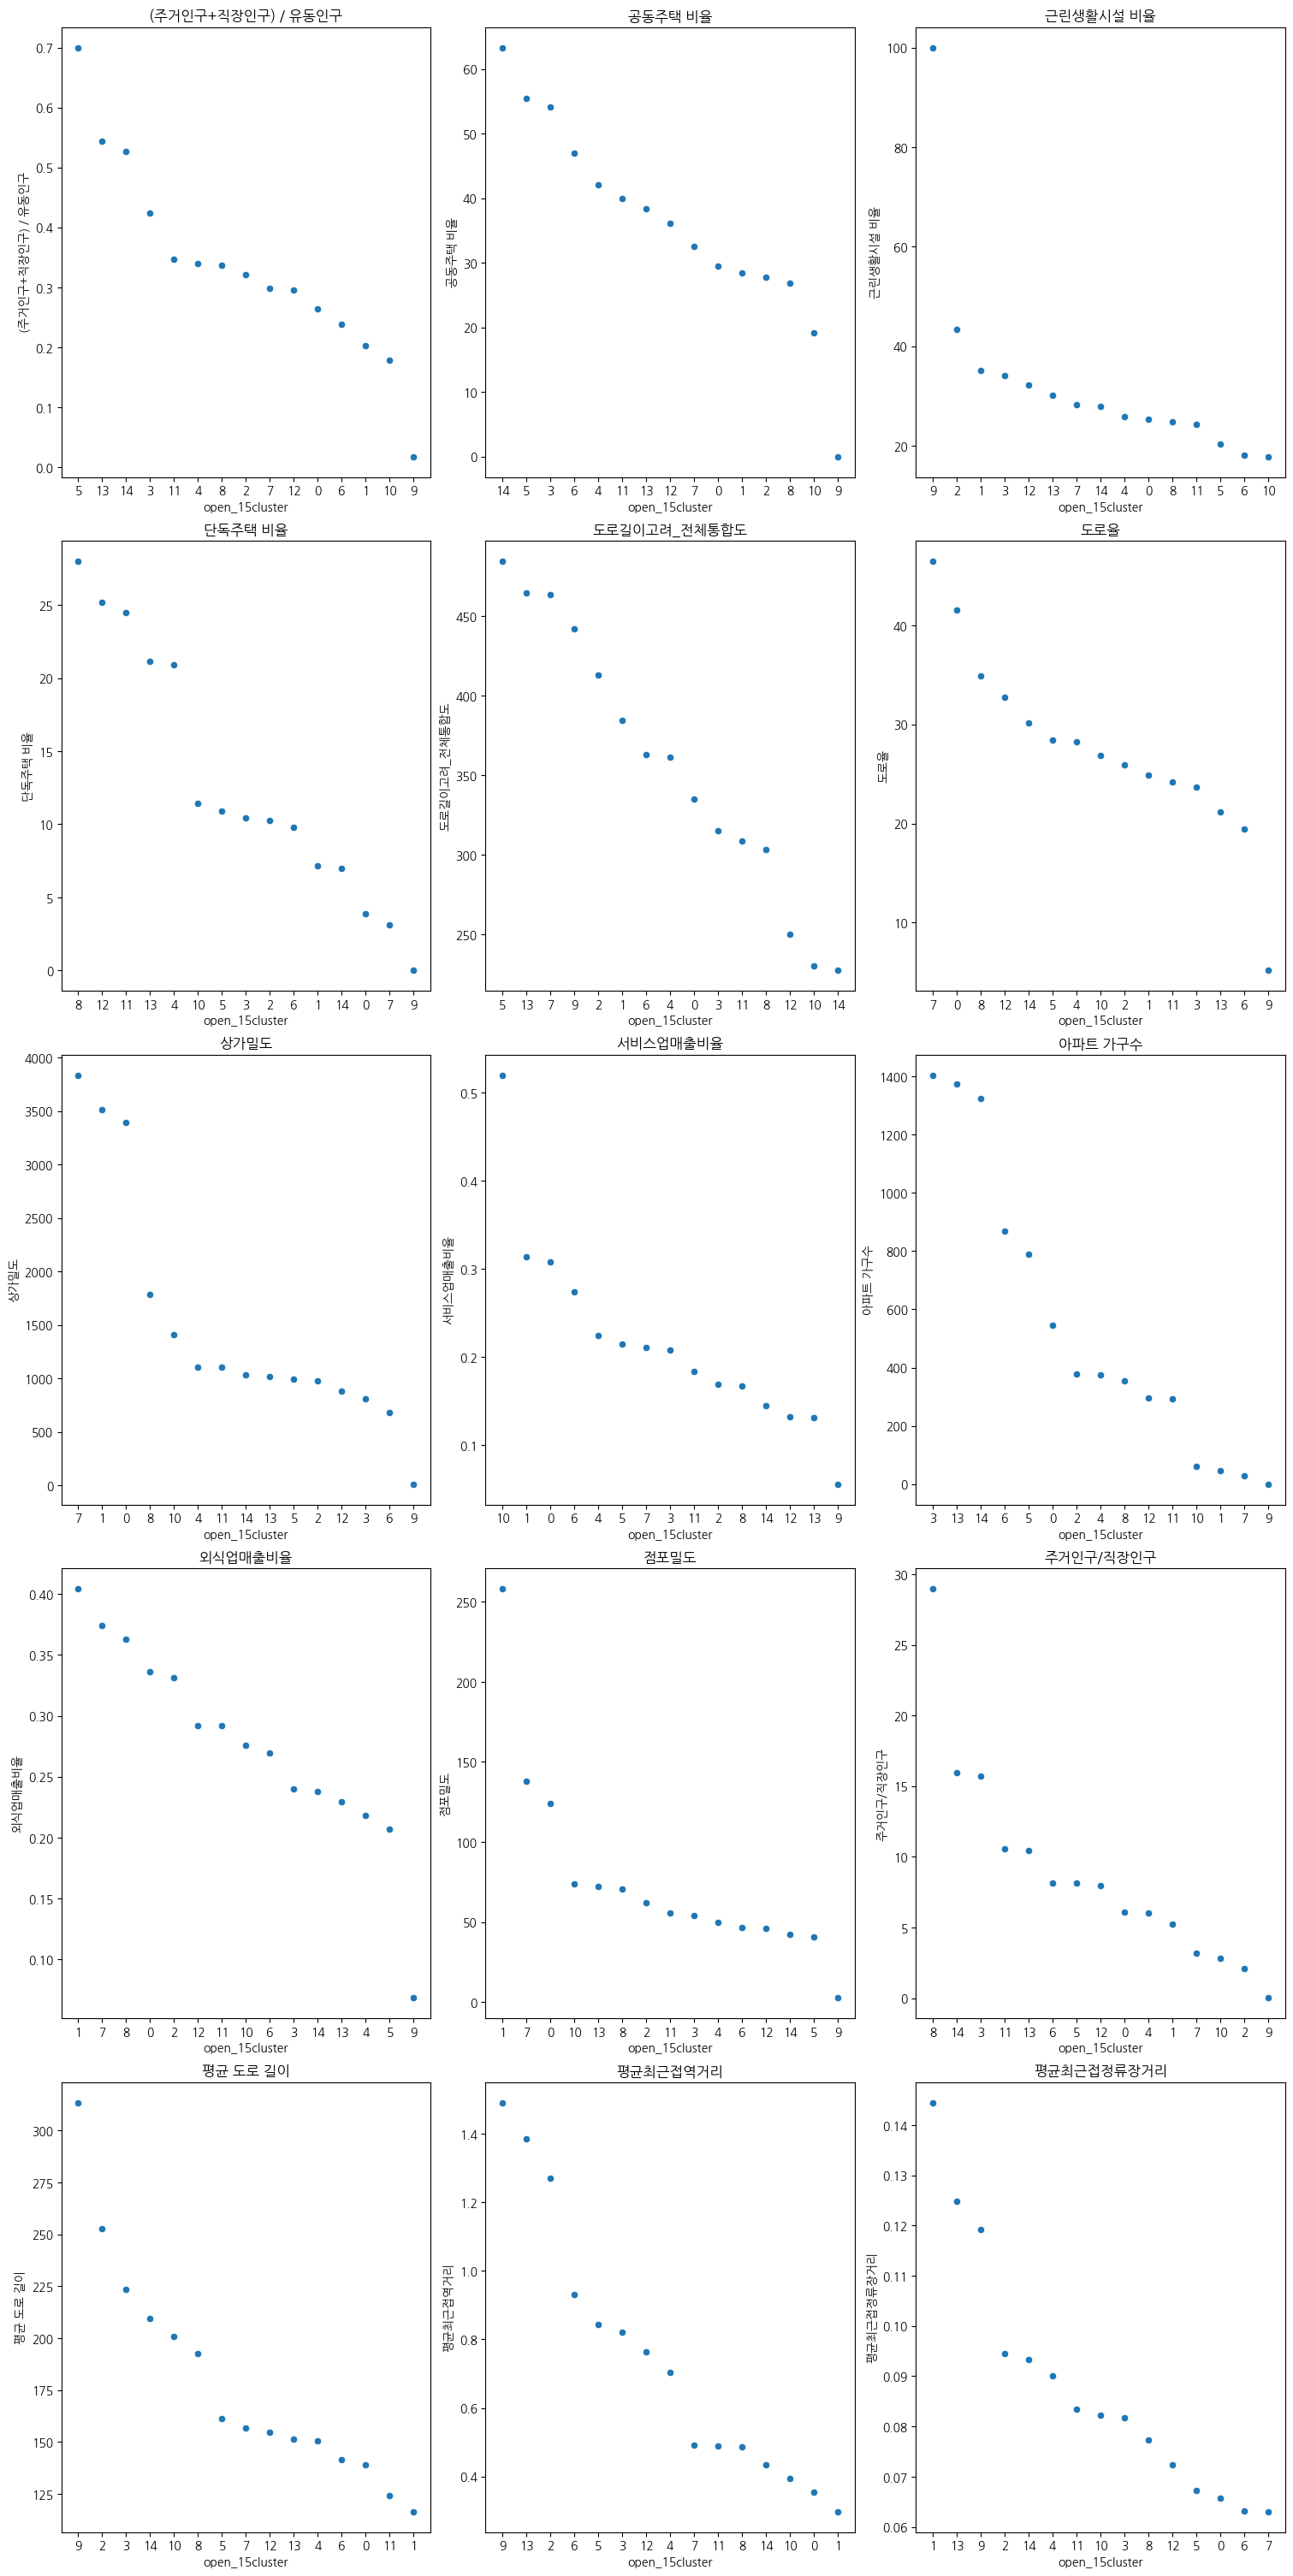

In [70]:
col_list = open_agg_by_cluster.columns[1:]
nrows = int((len(col_list)-1)/3)+1
ncols = 3

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,30),constrained_layout=True)

for i in range(nrows):
    for j in range(ncols):
        if (ncols*i+j) == len(col_list):
            break

        col_name = col_list[ncols*i+j]
        col_data = open_agg_by_cluster.loc[:,['open_15cluster',col_name]]
        col_data['open_15cluster'] = col_data['open_15cluster'].astype(str)
        col_data.sort_values(by=col_name,inplace=True,ascending=False)
        # display(col_data)
        sns.scatterplot(ax=axes[i,j],y=col_name,x='open_15cluster',data=col_data)
        axes[i,j].set_title(col_name)

plt.savefig('../data/결과 이미지/군집별 데이터 평균 (평균영업기간).jpg')
plt.show()

## 4.2 평균폐업기간

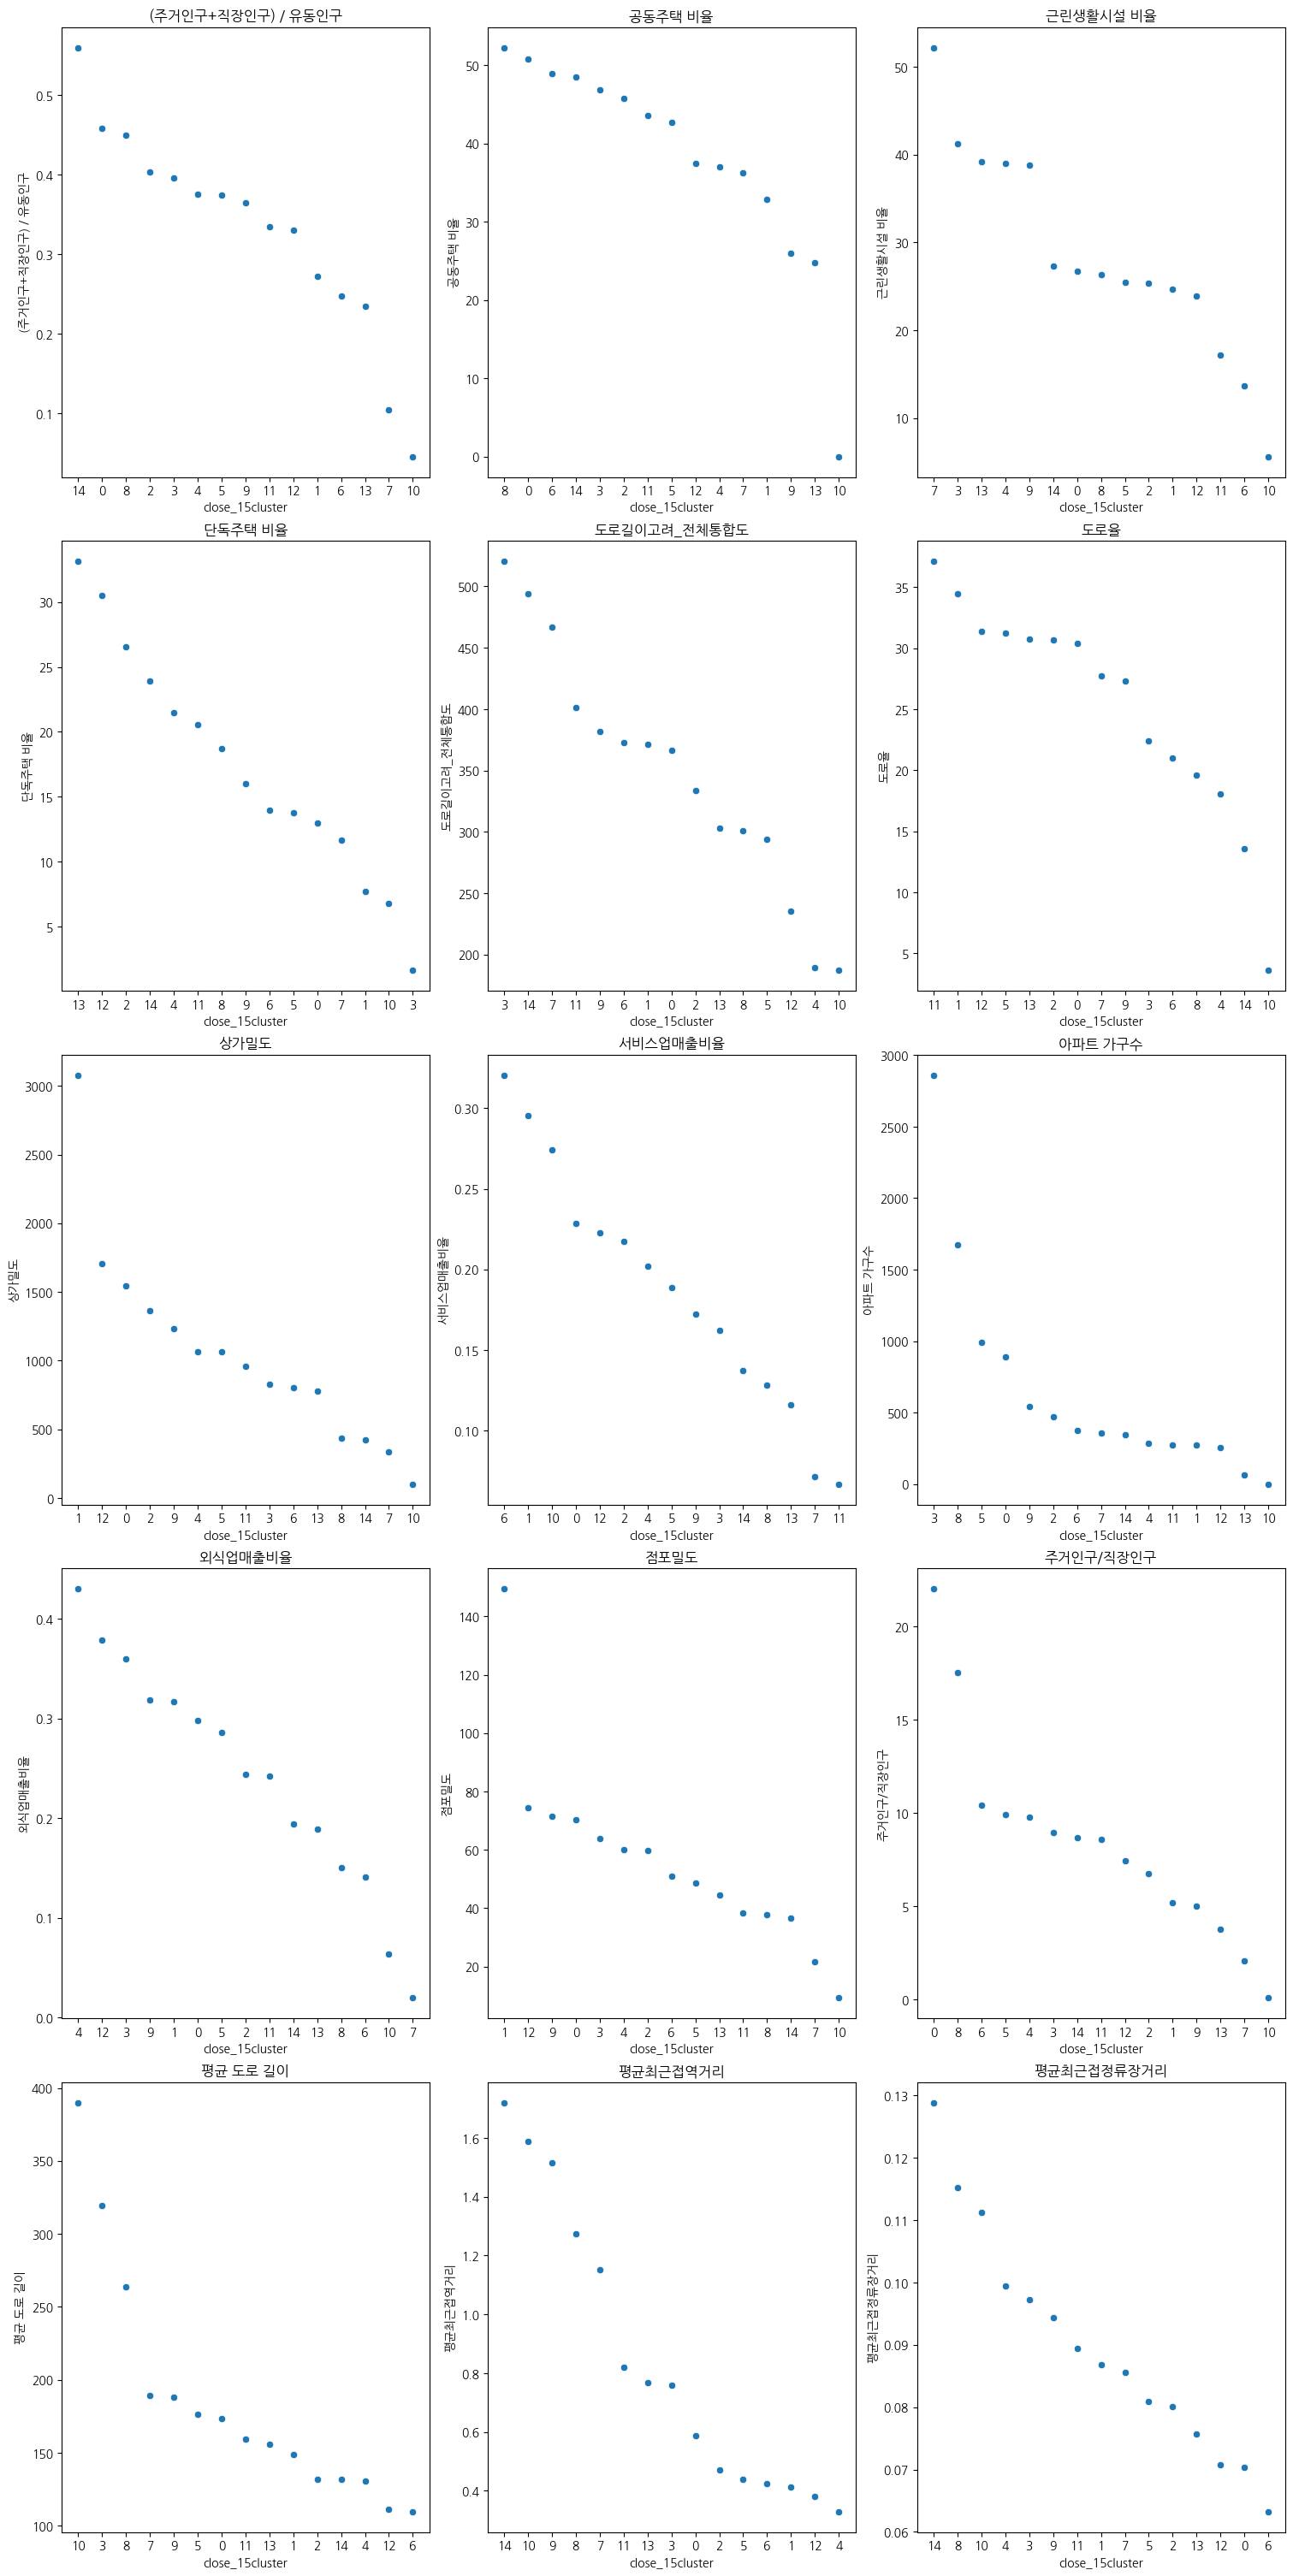

In [72]:
col_list = close_agg_by_cluster.columns[1:]
nrows = int((len(col_list)-1)/3)+1
ncols = 3

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,30),constrained_layout=True)

for i in range(nrows):
    for j in range(ncols):
        if (ncols*i+j) == len(col_list):
            break

        col_name = col_list[ncols*i+j]
        col_data = close_agg_by_cluster.loc[:,['close_15cluster',col_name]]
        col_data['close_15cluster'] = col_data['close_15cluster'].astype(str)
        col_data.sort_values(by=col_name,inplace=True,ascending=False)
        # display(col_data)
        sns.scatterplot(ax=axes[i,j],y=col_name,x='close_15cluster',data=col_data)
        axes[i,j].set_title(col_name)

plt.savefig('../data/결과 이미지/군집별 데이터 평균 (평균폐업기간).jpg')
plt.show()